In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# numpy package
import numpy as np
import math

# keras modules
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
# for plotting
%matplotlib inline
import matplotlib.pyplot as plt

# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
batch_size = 32
num_classes = 10
epochs = 20

Using TensorFlow backend.


(100, 32, 32, 3)
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck


C:\Users\Ellysah\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


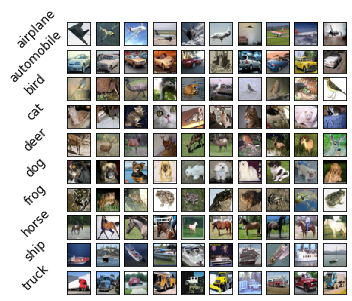

In [2]:
%matplotlib inline
row_names = ['{}'.format(row) for row in ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']]

class_id = 0
class_count = 0
images = None
for i in range(100):
    while True:
        index = np.random.randint(0, x_train.shape[0], size=1)
        image = x_train[index]
        if y_train[index] == class_id:
            break

    if images is None:
        images = image
    else:
        images = np.concatenate([images, image], axis=0)
    class_count += 1
    if class_count == 10:
        class_id += 1
        class_count = 0
      
print(images.shape)
plt.figure(figsize=(5, 5))
num_images = images.shape[0]
image_size = images.shape[1]
rows = int(math.sqrt(num_images))
row_names = ['{}'.format(row) for row in ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']]
index = 0
for i in range(num_images):
    ax = plt.subplot(rows, rows, i + 1)
    image = images[i, :, :, :]
    image = np.reshape(image, [image_size, image_size, 3])
    plt.imshow(image)
    # plt.axis('off')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(False)
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none') 
    if (i % rows) == 0:
        ax.set_ylabel(row_names[index], rotation=45, size='large')
        ax.yaxis.labelpad = 20
        print(row_names[index])
        index += 1

plt.tight_layout()
plt.savefig("cifar10-samples.png")
plt.show();
#plt.close('all')

In [3]:
#pre-processing
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255
hidden_units = 1024
dropout = 0.2
input_size = x_train.shape[1:]
# model is a 3-layer CNN with ReLU and dropout after each layer
cnn = Sequential()
#layer1
cnn.add(Conv2D(filters=64, kernel_size=2, strides=1, padding='same', activation='relu', input_shape=x_train.shape[1:]))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Dropout(dropout))
#layer2
cnn.add(Conv2D(filters=128, kernel_size=4, strides=1, padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Dropout(dropout))
#layer3
cnn.add(Conv2D(filters=128, kernel_size=4, strides=1, padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Dropout(dropout))

cnn.add(Flatten())
cnn.add(Dropout(dropout))
#cnn.add(Dense(hidden_units,activation='relu'))
#cnn.add(Dropout(dropout))
cnn.add(Dense(num_classes, activation='softmax'))
cnn.summary()

W0922 15:17:51.148964  3172 deprecation_wrapper.py:119] From C:\Users\Ellysah\Anaconda3\envs\keras-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0922 15:17:51.163866  3172 deprecation_wrapper.py:119] From C:\Users\Ellysah\Anaconda3\envs\keras-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0922 15:17:51.167858  3172 deprecation_wrapper.py:119] From C:\Users\Ellysah\Anaconda3\envs\keras-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0922 15:17:51.193826  3172 deprecation_wrapper.py:119] From C:\Users\Ellysah\Anaconda3\envs\keras-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0922 15:17

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       131200    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         262272    
__________

In [4]:
# loss function for one-hot vector
# use of sgd optimizer with default lr=0.01
# accuracy is good metric for classification tasks
cnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
epochs=20
cnn.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)


W0922 15:17:57.327429  3172 deprecation_wrapper.py:119] From C:\Users\Ellysah\Anaconda3\envs\keras-gpu\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0922 15:17:57.367319  3172 deprecation_wrapper.py:119] From C:\Users\Ellysah\Anaconda3\envs\keras-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0922 15:17:57.491985  3172 deprecation.py:323] From C:\Users\Ellysah\Anaconda3\envs\keras-gpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
50000/50000 [==============================] - 47s 937us/step - loss: 1.4940 - acc: 0.4604
Epoch 2/20
50000/50000 [==============================] - 44s 886us/step - loss: 1.0930 - acc: 0.6161
Epoch 3/20
50000/50000 [==============================] - 45s 908us/step - loss: 0.9685 - acc: 0.6590
Epoch 4/20
50000/50000 [==============================] - 47s 940us/step - loss: 0.8872 - acc: 0.6921
Epoch 5/20
50000/50000 [==============================] - 47s 944us/step - loss: 0.8289 - acc: 0.7094
Epoch 6/20
50000/50000 [==============================] - 46s 930us/step - loss: 0.7854 - acc: 0.7255
Epoch 7/20
50000/50000 [==============================] - 46s 925us/step - loss: 0.7571 - acc: 0.7330
Epoch 8/20
50000/50000 [==============================] - 46s 929us/step - loss: 0.7354 - acc: 0.7428
Epoch 9/20
50000/50000 [==============================] - 47s 936us/step - loss: 0.7066 - acc: 0.7546
Epoch 10/20
50000/50000 [==============================] - 47s 939us/step - loss: 

In [5]:
# validate the model on test dataset to determine generalization
loss, acc = cnn.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

10000/10000 [==============================] - 5s 512us/step

Test accuracy: 77.5%


In [6]:
from keras.preprocessing import image
import imageio
test_image = []
for i in range(300):
    img = imageio.imread('cifar10/test/'+ str(i+1) +'.png')
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

In [7]:
# Predict using the 300 images from test set
class_pred = cnn.predict(test)
class_pred
labels_pred = np.argmax(class_pred,axis=1)
print(labels_pred)
labels_pred_names = []
for label in labels_pred:
    name = row_names[label]
    labels_pred_names.append(name)
print(labels_pred_names)

[4 0 1 8 8 3 0 4 2 3 2 3 3 8 5 0 4 4 0 4 0 8 6 1 3 9 1 3 4 3 2 7 5 2 3 4 3
 5 8 5 2 4 9 4 7 1 4 2 0 3 2 7 2 6 8 8 3 8 0 3 5 3 3 6 8 9 8 7 3 3 9 2 9 4
 4 7 0 3 7 6 2 4 8 2 6 3 5 6 6 0 9 0 6 7 1 6 4 2 9 2 4 0 3 3 8 2 1 6 6 6 4
 2 4 0 9 7 5 7 0 6 8 9 7 3 8 3 6 3 8 5 0 5 3 3 3 3 5 6 2 1 6 5 6 4 4 1 3 1
 3 6 8 5 5 8 9 7 0 8 6 4 4 5 6 5 6 1 6 4 3 6 6 3 3 6 6 8 5 1 2 1 6 9 4 3 8
 5 8 9 5 2 1 8 0 3 9 2 1 3 8 6 8 4 0 3 0 2 3 2 6 5 1 7 5 6 3 9 5 2 3 1 6 0
 5 4 2 2 7 3 7 9 0 2 4 5 7 6 4 4 9 0 3 5 4 5 3 4 2 9 7 8 4 0 6 0 8 4 6 8 4
 0 3 1 9 4 6 6 3 2 2 1 5 9 2 3 7 3 6 2 5 5 5 2 3 3 3 1 8 9 3 4 1 4 8 2 8 2
 3 4 8 9]
['deer', 'airplane', 'automobile', 'ship', 'ship', 'cat', 'airplane', 'deer', 'bird', 'cat', 'bird', 'cat', 'cat', 'ship', 'dog', 'airplane', 'deer', 'deer', 'airplane', 'deer', 'airplane', 'ship', 'frog', 'automobile', 'cat', 'truck', 'automobile', 'cat', 'deer', 'cat', 'bird', 'horse', 'dog', 'bird', 'cat', 'deer', 'cat', 'dog', 'ship', 'dog', 'bird', 'deer', 'truck', 'deer', 'horse', 